In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train.reshape(60000, 784)

x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [5]:
input_img = Input(shape=(784,))
# encoder
encoder1 = Dense(128, activation = 'sigmoid')(input_img)
encoder2 = Dense(3, activation = 'sigmoid')(encoder1)

# decoder
decoder1 = Dense(128, activation = 'sigmoid')(encoder2)
decoder2 = Dense(784, activation = 'sigmoid')(decoder1)

autoencoder = Model(inputs = input_img, outputs = decoder2)

In [6]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
 dense_2 (Dense)             (None, 128)               512       
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
Total params: 202,515
Trainable params: 202,515
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2567 - val_loss: 0.2303
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2322 - val_loss: 0.2154
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2145 - val_loss: 0.1998
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2062 - val_loss: 0.1965
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2030 - val_loss: 0.1929


In [9]:
encoder = Model(inputs = input_img, outputs= encoder2)
latent_vector = encoder.predict(x_test)

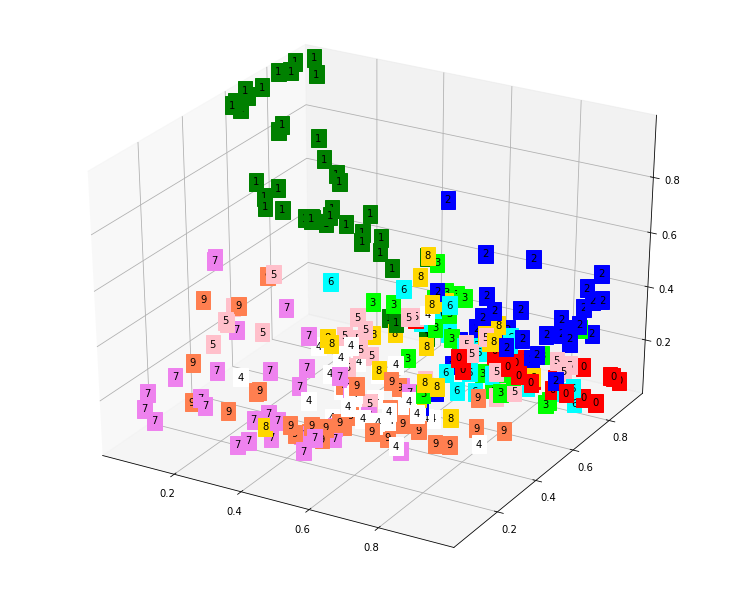

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']
for x, y, z , label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor = c)

ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()